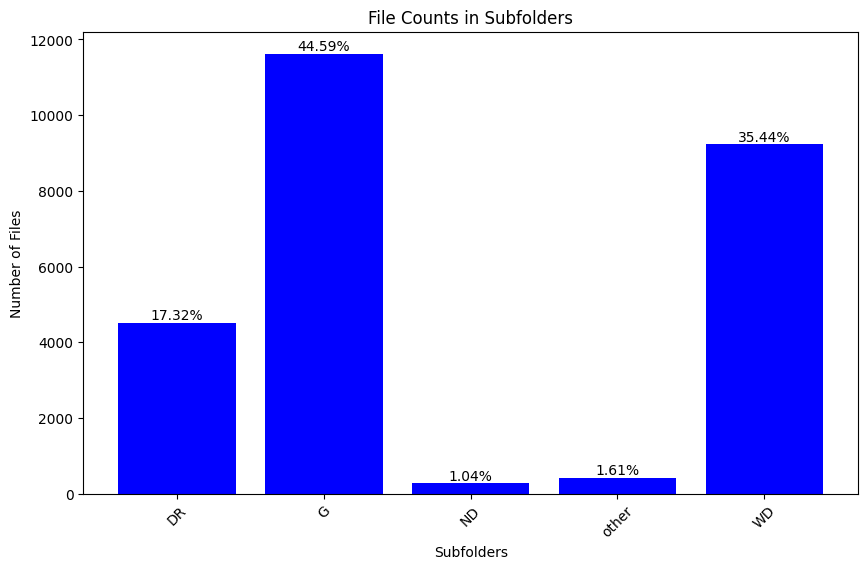

In [1]:
import os
import matplotlib.pyplot as plt

def count_files_in_subfolders(main_folder):
    subfolders = [f.path for f in os.scandir(main_folder) if f.is_dir()]
    file_counts = {}
    for folder in subfolders:
        count = sum([len(files) for r, d, files in os.walk(folder)])
        folder_name = os.path.basename(folder)
        file_counts[folder_name] = count
    return file_counts

def visualize_file_counts(file_counts):
    folders = list(file_counts.keys())
    counts = list(file_counts.values())
    total_files = sum(counts)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(folders, counts, color='blue')

    for bar in bars:
        yval = bar.get_height()
        percentage = yval / total_files * 100
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', va='bottom', ha='center')

    plt.xlabel('Subfolders')
    plt.ylabel('Number of Files')
    plt.title('File Counts in Subfolders')
    plt.xticks(rotation=45)
    plt.show()

# Replace 'path_to_main_folder' with the actual path of your main folder
main_folder = r'images\images\train'
file_counts = count_files_in_subfolders(main_folder)
visualize_file_counts(file_counts)


In [2]:
# Hyperparameters
import torch

BATCH_SIZE = 32
NUM_WORKERS = 0
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
# Select a pretrained_model to train
import torchvision

# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # "DEFAULT" = best available weights
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [4]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [5]:
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torchvision import transforms

def display_images(root_dir,rows=4,cols=4):
    transform = transforms.Compose([transforms.Resize([224,224])])

    dataset = ImageFolder(root=r'images\images\train',
                            transform=transform,
                            target_transform=None)

    # Get class names
    class_names = dataset.classes

    # Plot more images
    fig = plt.figure(figsize=(9, 9))
    for i in range(1, rows * cols + 1):
        random_idx = torch.randint(0, len(dataset), size=[1]).item()
        img, label = dataset[random_idx]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis(False)

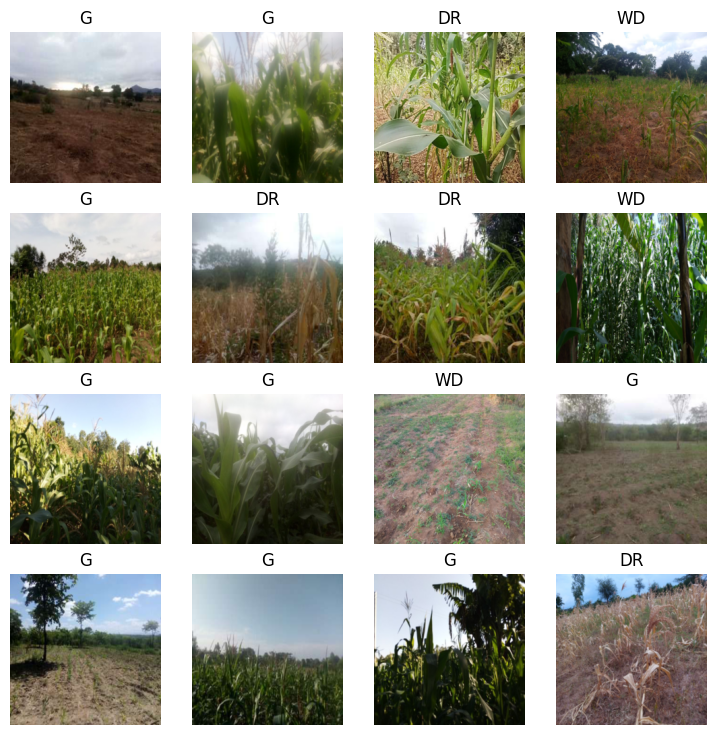

In [6]:
display_images(r'images\images\train',rows=4,cols=4)

In [7]:
class NormalizeTransform:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, image):
        # Assumes 'image' is a PyTorch tensor
        normalized_image = (image - self.mean) / self.std
        return normalized_image
    
# Define the mean and std
mean = torch.tensor([0.485, 0.456, 0.406])  # Replace with your mean values
std = torch.tensor([0.229, 0.224, 0.225])   # Replace with your std values

In [8]:
manual_transform_1 = transforms.Compose([
    transforms.AugMix(severity= 6,mixture_width=2),
    transforms.Resize([256,256],interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [9]:
manual_transform_3 = transforms.Compose([
    transforms.RandomHorizontalFlip(),    # Randomly flips the image horizontally
    transforms.RandomVerticalFlip(),      # Randomly flips the image vertically
    transforms.RandomRotation(30),        # Randomly rotates the image by up to 30 degrees
    transforms.Resize([256,256],interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [10]:
manual_transform_7 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),    # Randomly flips the image horizontally
    transforms.RandomRotation(30),        # Randomly rotates the image by up to 30 degrees
    transforms.RandomGrayscale(p=0.2),    # Randomly converts images to grayscale with a probability of 0.2
    transforms.RandomAdjustSharpness(sharpness_factor=2,p=0.5),
    transforms.RandomAffine(              # Applies random affine transformations
        degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10
    ),
    transforms.RandomPerspective(         # Applies a random perspective transformation
        distortion_scale=0.5, p=0.5
    ),
    transforms.RandomApply([transforms.ColorJitter(               # Randomly varies brightness, contrast, saturation, and hue
        brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5
    ),
    transforms.GaussianBlur(              # Applies a Gaussian blur with a random kernel size
        kernel_size=(5, 9), sigma=(0.1, 5)
    )],p=0.25),
    transforms.Resize([256,256],interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [11]:
manual_transform_chatgpt = transforms.Compose([
    transforms.RandomResizedCrop(224),    # Randomly crops and resizes the image
    transforms.RandomHorizontalFlip(),    # Randomly flips the image horizontally
    transforms.RandomVerticalFlip(),      # Randomly flips the image vertically
    transforms.RandomRotation(30),        # Randomly rotates the image by up to 30 degrees
    transforms.ColorJitter(               # Randomly varies brightness, contrast, saturation, and hue
        brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5
    ),
    transforms.RandomGrayscale(p=0.2),    # Randomly converts images to grayscale with a probability of 0.2
    transforms.RandomAffine(              # Applies random affine transformations
        degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10
    ),
    transforms.RandomPerspective(         # Applies a random perspective transformation
        distortion_scale=0.5, p=0.5
    ),
    transforms.GaussianBlur(              # Applies a Gaussian blur with a random kernel size
        kernel_size=(5, 9), sigma=(0.1, 5)
    ),
    transforms.ToTensor(),                # Converts the image to a PyTorch tensor
    transforms.Normalize(                 # Normalizes the tensor
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    )
])

In [12]:
# Rewrite the dataset variable to transfrom using auto transform 
dataset = ImageFolder(root=r'images\images\train',
                            transform=None,
                            target_transform=None)


In [13]:
# Set a seed for randomness
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get class names
class_names = dataset.classes

# Turn images into data loaders
# from torch.utils.data import DataLoader, random_split

# # Define the ratio of data to use for testing (e.g., 20% for testing)
# test_ratio = 0.2

# # Calculate the sizes of the training and test sets
# total_size = len(dataset)
# test_size = int(test_ratio * total_size)
# train_size = total_size - test_size
# print(f'total size = {total_size}| train size = {train_size}| test size = {test_size}')

# # Split the dataset into training and test sets
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Change Tranforms down here in the last line

In [14]:
from torch.utils.data import DataLoader, Subset, random_split

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Custom Subset class to apply different transformations
class TransformedSubset(Subset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        x, y = self.subset[idx]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

# Apply transformations
train_dataset = TransformedSubset(train_dataset, transform=manual_transform_7)
test_dataset = TransformedSubset(test_dataset, transform=auto_transforms)

Sampler Code Below


------------------------------------------------------------------------------

In [15]:
# Calculate weights for each class
class_counts = torch.bincount(torch.tensor([sample[1] for sample in train_dataset]))

In [16]:
class_weights = 1. / class_counts.float()

In [17]:
weightss = class_weights[torch.tensor([sample[1] for sample in train_dataset])]

In [18]:
class_names..

SyntaxError: invalid syntax (278377114.py, line 1)

Full dataset has

[4516,11623,272,9238,419]

In [ ]:
class_counts

tensor([3603, 9328,  217, 7372,  334])

In [ ]:
class_weights

tensor([0.0003, 0.0001, 0.0046, 0.0001, 0.0030])

In [ ]:
weightss.shape

torch.Size([20854])

In [ ]:
from torch.utils.data import DataLoader, WeightedRandomSampler

# Create a WeightedRandomSampler
sampler = WeightedRandomSampler(weights=weightss,
                                num_samples=len(weightss),
                                replacement=True)

-----------------------------------------
Sampler Code above


In [ ]:
# Convert to dataloaders
BATCH_SIZE = 16

train_dataloader = DataLoader(
      train_dataset,
      batch_size=BATCH_SIZE,
      # shuffle=True,
      sampler=sampler, # Added Sampler here
      num_workers=NUM_WORKERS,
      pin_memory=True,
  )
test_dataloader = DataLoader(
      test_dataset,
      batch_size=BATCH_SIZE,
      shuffle=False,
      num_workers=NUM_WORKERS,
      pin_memory=True,
  )

In [5]:
# New method of creating a pretrained model (torchvision v0.13+)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # ".DEFAULT" = best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# # Freeze the frst two blocks. There are 9 blocks
# block_count = 0
# for child in model.features.children():
#     if block_count < 7:
#         for param in child.parameters():
#             param.requires_grad = False
#         block_count += 1
#     else:
#         break


In [6]:
# Print with torchinfo
from torchinfo import summary

summary(model=model,
        input_size=(1, 3, 224, 224), # example of [batch_size, color_channels, height, width]
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 16, 112,

In [ ]:
# Update the classifier head of our model to suit our problem
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(#in_features=1280, # feature vector coming in EfficientNetB0 and EfficientNetB1
              in_features=1408,
              out_features=len(class_names))).to(device) # how many classes do we have?

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1408, out_features=5, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import StepLR, ExponentialLR, ReduceLROnPlateau

LR = 0.001
gamma = 0.9

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# Trying step decay - Not used yet, but planned to use
# scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
# scheduler = ExponentialLR(optimizer, gamma=gamma)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

In [ ]:
def count_files_in_directory(directory):
    """
    Count the number of files in the given directory.

    :param directory: Path to the directory
    :return: Number of files in the directory
    """
    if not os.path.isdir(directory):
        print(f"The specified path {directory} is not a directory.")
        return

    # Count the number of files
    file_count = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
    return file_count
directory_path = r'models'
exp_num = count_files_in_directory(directory_path)
print(exp_num)

16


In [ ]:
# Import train function
import importlib
from going_modular import engine
importlib.reload(engine)

# Things we change in every experiment that needs to be manually put
mmodel_name = str(input('Enter the model name'))
epochs = int(input('Enter the number of Epochs'))
early_stop = 10
model_save_path = r'models//'
exp_num = int(count_files_in_directory(directory_path))

seed = int(42)

# Set the manual seeds
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# Get the transform used for the model training
transform_used = train_dataset.transform

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer, # You can put an optimizer and scheduler here
                       scheduler=scheduler,
                       gamma=gamma,
                       loss_fn=loss_fn,
                       epochs=epochs,
                       device=device,
                       transform_used=transform_used,
                       seed_number=seed,
                       exp_num=exp_num,
                       model_name = mmodel_name,
                       model_save_path = model_save_path,
                       early_stop=early_stop,
                       )

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Total Training:   0%|          | 0/10 [00:00<?, ?it/s]

Model Training loop:   0%|          | 0/652 [00:00<?, ?it/s]

Training Stopped
[INFO] Total training time: 12.422 seconds


In [ ]:
..

SyntaxError: invalid syntax (304270658.py, line 1)

In [ ]:
# import torch
# # load model to variable
# # Load the model
# model = torch.load(r'models\best_7.ph')

# # Set the model to evaluation mode
# model.eval()

# Predicition

In [ ]:
# Predicition
import pandas as pd
from PIL import Image

# Input filepaths here
valid_dir = r'images\images\valid\\'
valid_csv = pd.read_csv(r'Test.csv')
pred_df = pd.DataFrame({'ID':[],
                        'DR':[],
                        'G':[],
                        'ND':[],
                        'WD':[],
                        'other':[]})

# Iterate in each image and get the prediction
model.eval()
with torch.inference_mode():
    for i,file_name in enumerate(valid_csv['filename']):
        # Store the variable file_row
        ID = valid_csv.iloc[i,0]
        # print(ID)

        # Concatenate to get the file_path
        file_path = valid_dir + file_name
        # print(i,filepath,valid_csv.iloc[[i]])
        
        # Open image
        img = Image.open(file_path)
        
        # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = auto_transforms(img).unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))

        # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
        target_image_pred_probs = list(torch.softmax(target_image_pred, dim=1).to('cpu').numpy())

        # print(target_image_pred_probs[0][0])

        # New row to be added
        new_row = {'ID': ID,
                    'DR':target_image_pred_probs[0][0],
                    'G':target_image_pred_probs[0][1],
                    'ND':target_image_pred_probs[0][2],
                    'WD':target_image_pred_probs[0][3],
                    'other':target_image_pred_probs[0][4]}
        
        # break
        # pred_df = pred_df.append(new_row,ignore_index = True)
        pred_df = pd.concat([pred_df,pd.DataFrame([new_row])],ignore_index=True)
pred_df

,ID,DR,G,ND,WD,other
0,ID_QW9GQM,0.001243,0.451623,3.757454e-08,0.546976,1.578706e-04
1,ID_G9VPQ9,0.083002,0.795270,2.172994e-04,0.096697,2.481327e-02
2,ID_QIMIEM,0.000004,0.663436,4.215621e-10,0.336559,3.669531e-07
3,ID_TSINUQ,0.000149,0.600149,2.034607e-08,0.399701,1.709982e-06
4,ID_I7OOHH,0.128188,0.576796,3.064997e-06,0.295000,1.332290e-05
...,...,...,...,...,...,...
8658,ID_JZJP19,0.000159,0.611111,1.243708e-06,0.388728,4.251577e-07
8659,ID_137G9B,0.001218,0.378884,1.059021e-04,0.545701,7.409089e-02
8660,ID_F7R60Y,0.000401,0.046455,7.246714e-07,0.952971,1.732024e-04
8661,ID_76JGLU,0.004653,0.108529,1.745253e-05,0.886047,7.539498e-04


In [ ]:
class_names

['DR', 'G', 'ND', 'WD', 'other']

In [ ]:
submisison_num = exp_num
pred_df.to_csv(r'submisisons//'+str(submisison_num)+'.csv',index=False)